In [1]:
import pandas as pd # Library for handling data structures like DataFrames and Series
import numpy as np # Library for numerical operations, such as linear algebra and statistical functions
from matplotlib import pyplot as plt # Library for creating static, animated, and interactive visualizations in Python

In [2]:
import os
current_working_directory = os.getcwd()
print("Current working directory:", current_working_directory)

Current working directory: /home/jovyan/work/GGIS570/FinalProject


In [3]:
#reading cleaned data file into data frame
hawaii_raw=pd.read_csv('/home/jovyan/work/GGIS570/FinalProject/HawaiiData.csv')

In [4]:
hawaii_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15014 entries, 0 to 15013
Data columns (total 60 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   Latitude                                15014 non-null  float64
 1   Longitude                               15014 non-null  float64
 2   Zipcode                                 15014 non-null  int64  
 3   id                                      15014 non-null  float64
 4   listing_url                             15014 non-null  object 
 5   name                                    15014 non-null  object 
 6   picture_url                             15014 non-null  object 
 7   host_id                                 15014 non-null  int64  
 8   host_url                                15014 non-null  object 
 9   host_name                               15014 non-null  object 
 10  host_location                           11319 non-null  ob

In [5]:
hawaii_raw.dropna()
hawaii_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15014 entries, 0 to 15013
Data columns (total 60 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   Latitude                                15014 non-null  float64
 1   Longitude                               15014 non-null  float64
 2   Zipcode                                 15014 non-null  int64  
 3   id                                      15014 non-null  float64
 4   listing_url                             15014 non-null  object 
 5   name                                    15014 non-null  object 
 6   picture_url                             15014 non-null  object 
 7   host_id                                 15014 non-null  int64  
 8   host_url                                15014 non-null  object 
 9   host_name                               15014 non-null  object 
 10  host_location                           11319 non-null  ob

In [6]:
pip install geopandas

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [7]:
#reading zipcode wise shape file of US
import geopandas
hawaii_zipcode_gdf=geopandas.read_file("/home/jovyan/work/GGIS570/FinalProject/ShapeFiles/tl_2022_us_zcta520.shp")

In [8]:
hawaii_zipcode_gdf.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 33791 entries, 0 to 33790
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   ZCTA5CE20   33791 non-null  object  
 1   GEOID20     33791 non-null  object  
 2   CLASSFP20   33791 non-null  object  
 3   MTFCC20     33791 non-null  object  
 4   FUNCSTAT20  33791 non-null  object  
 5   ALAND20     33791 non-null  int64   
 6   AWATER20    33791 non-null  int64   
 7   INTPTLAT20  33791 non-null  object  
 8   INTPTLON20  33791 non-null  object  
 9   geometry    33791 non-null  geometry
dtypes: geometry(1), int64(2), object(7)
memory usage: 2.6+ MB


In [9]:
#merging shp gdf (geopandas data frame) and hawaii raw df (data frame)

hawaii_zipcode_gdf['ZCTA5CE20']=hawaii_zipcode_gdf['ZCTA5CE20'].astype(int)
hawaii_raw.rename(columns = {'Zipcode':'ZCTA5CE20'}, inplace = True)
#Merge the shapefile with the places data by the common column - ZCTA5CE20
hawaii_zipcode_gdf_merged = hawaii_zipcode_gdf.merge(hawaii_raw, on = "ZCTA5CE20")
#Final GeoDataFrame

hawaii_zipcode_gdf_merged.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
Int64Index: 15014 entries, 0 to 15013
Data columns (total 69 columns):
 #   Column                                  Non-Null Count  Dtype   
---  ------                                  --------------  -----   
 0   ZCTA5CE20                               15014 non-null  int64   
 1   GEOID20                                 15014 non-null  object  
 2   CLASSFP20                               15014 non-null  object  
 3   MTFCC20                                 15014 non-null  object  
 4   FUNCSTAT20                              15014 non-null  object  
 5   ALAND20                                 15014 non-null  int64   
 6   AWATER20                                15014 non-null  int64   
 7   INTPTLAT20                              15014 non-null  object  
 8   INTPTLON20                              15014 non-null  object  
 9   geometry                                15014 non-null  geometry
 10  Latitude                              

In [10]:
#converts the resulting values to floats using the 'astype' method
hawaii_zipcode_gdf_merged['price'] = hawaii_zipcode_gdf_merged['price'].astype(float)

In [11]:
#Dropping non relevant columns to get final geodataframe called hawaii_final
hawaii_final = hawaii_zipcode_gdf_merged.drop(columns=['host_location', 'review_scores_value','review_scores_location','review_scores_communication','review_scores_checkin','review_scores_cleanliness','review_scores_accuracy','review_scores_rating','beds','bedrooms','bathrooms_text','host_neighbourhood','host_neighbourhood','host_location'])
hawaii_final.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
Int64Index: 15014 entries, 0 to 15013
Data columns (total 57 columns):
 #   Column                                  Non-Null Count  Dtype   
---  ------                                  --------------  -----   
 0   ZCTA5CE20                               15014 non-null  int64   
 1   GEOID20                                 15014 non-null  object  
 2   CLASSFP20                               15014 non-null  object  
 3   MTFCC20                                 15014 non-null  object  
 4   FUNCSTAT20                              15014 non-null  object  
 5   ALAND20                                 15014 non-null  int64   
 6   AWATER20                                15014 non-null  int64   
 7   INTPTLAT20                              15014 non-null  object  
 8   INTPTLON20                              15014 non-null  object  
 9   geometry                                15014 non-null  geometry
 10  Latitude                              

In [12]:
hawaii_final.dropna()
hawaii_final.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
Int64Index: 15014 entries, 0 to 15013
Data columns (total 57 columns):
 #   Column                                  Non-Null Count  Dtype   
---  ------                                  --------------  -----   
 0   ZCTA5CE20                               15014 non-null  int64   
 1   GEOID20                                 15014 non-null  object  
 2   CLASSFP20                               15014 non-null  object  
 3   MTFCC20                                 15014 non-null  object  
 4   FUNCSTAT20                              15014 non-null  object  
 5   ALAND20                                 15014 non-null  int64   
 6   AWATER20                                15014 non-null  int64   
 7   INTPTLAT20                              15014 non-null  object  
 8   INTPTLON20                              15014 non-null  object  
 9   geometry                                15014 non-null  geometry
 10  Latitude                              

In [13]:
#dissolve Hawaii's final dataset by zip code boundaries ('ZCTA5CE20') and then retrieving the boundary geometry for each zip code for aggregated granularity
zipcode_gdf = hawaii_final.dissolve(by='ZCTA5CE20').geometry.boundary

In [14]:
#defining two variables, y and X, based on the data in a DataFrame called hawaii_final
variable_names=['price', 'Average Annual Max Temp (F)', 'Average Annual Min Temp (F)', 'Average Annual Precipitation (inches)', 'Average Annual Wind Speed (mph)', 'Average Annual UV Index (0-10)', 'Average Annual Visibility (miles)', 'Average Annual Cloud Cover (%)', 'Average Annual Humidity (%)', 'Average Annual Solar Radiation (W/m^2)']
y = hawaii_final[['median_ppsf']].values
X = hawaii_final[variable_names].values

In [15]:
pip install libpysal

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [16]:
pip install splot

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [17]:
# Import required libraries for data visualization and spatial analysis
import seaborn as sns
import matplotlib.pyplot as plt
from libpysal.weights import Queen

# Import splot library for Moran's plot and esda for Moran's I statistic calculation
from splot.esda import plot_moran
from esda.moran import Moran

# Import spreg for spatial regression analysis
import spreg

In [18]:
# Ordinary Least Squares (OLS) regression to model the relationship between the dependent variable 'median_ppsf' and the independent variables specified in 'variable_names', using the spreg.OLS library
ols = spreg.OLS(y, X, name_y='median_ppsf', name_x=variable_names)

In [19]:
print(ols.summary)

REGRESSION
----------
SUMMARY OF OUTPUT: ORDINARY LEAST SQUARES
-----------------------------------------
Data set            :     unknown
Weights matrix      :        None
Dependent Variable  : median_ppsf                Number of Observations:       15014
Mean dependent var  :    897.9359                Number of Variables   :          11
S.D. dependent var  :    248.8070                Degrees of Freedom    :       15003
R-squared           :      0.6396
Adjusted R-squared  :      0.6393
Sum squared residual:334987413.912                F-statistic           :   2662.0858
Sigma-square        :   22328.029                Prob(F-statistic)     :           0
S.E. of regression  :     149.426                Log likelihood        :  -96470.522
Sigma-square ML     :   22311.670                Akaike info criterion :  192963.043
S.E of regression ML:    149.3709                Schwarz criterion     :  193046.828

----------------------------------------------------------------------------

 The regression analysis aims to model the relationship between a dependent variable ('median_ppsf') and multiple independent variables.

Key information from the output:

Dataset and Model: The dataset used for the analysis is unknown, and there is no weights matrix specified. The number of observations is 5205, with 11 independent variables and 5194 degrees of freedom.

Model Fit: The R-squared value is 0.7272, indicating that the model explains approximately 72.72% of the variation in the dependent variable. The adjusted R-squared is 0.7267, which accounts for the number of independent variables.

Model Significance: The F-statistic is 1384.63, and the associated probability (p-value) is 0, indicating that the model is statistically significant at the 95% confidence level.

Coefficients: The table shows the coefficients for each independent variable, their standard errors, t-statistics, and probabilities (p-values). Variables with p-values less than 0.05 are considered statistically significant at the 95% confidence level.

Diagnostics: The model's multicollinearity condition number is 70506.524, which suggests that some independent variables might be highly correlated. The Jarque-Bera test indicates that the errors are not normally distributed (p-value = 0.0000). The Breusch-Pagan and Koenker-Bassett tests indicate that there is heteroskedasticity in the model (p-values = 0.0000).

Overall, the OLS regression output shows a statistically significant relationship between the dependent variable ('median_ppsf') and the independent variables. However, the diagnostics suggest potential issues with multicollinearity, non-normality of errors, and heteroskedasticity that may need to be addressed.

Text(0.5, 1.0, 'Map of residuals of the OLS model')

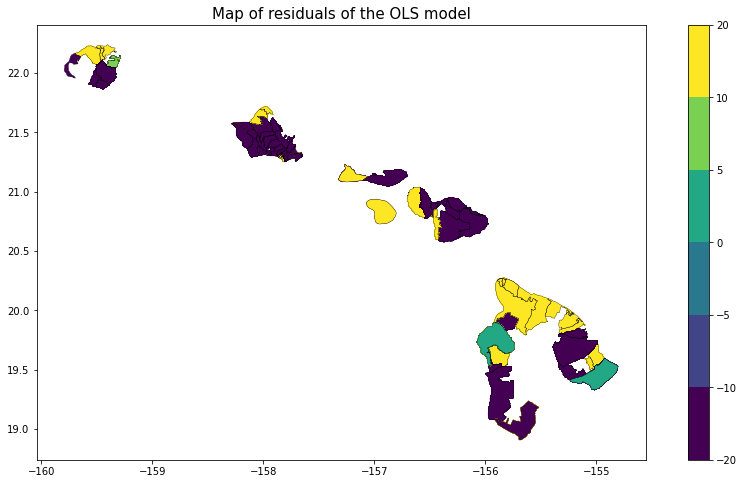

In [20]:
from matplotlib import colors

#For creating a discrete color classification - BoundaryNorm instance for discrete color classification
norm = colors.BoundaryNorm([-20, -10, -5, 0, 5, 10, 20],ncolors=256)

## Plot the residuals of the OLS model using the color norm defined above, with no linewidth for the polygons
ax = hawaii_final.plot(column=ols.u.reshape(-1),legend=True,figsize=(15,8), norm=norm, linewidth=0.0)

## Overlay zipcode boundaries on the plot with a thin black line
zipcode_gdf.plot(ax=ax,linewidth=0.3,edgecolor="black")

# Set the title for the plot with a font size of 15
plt.title("Map of residuals of the OLS model",fontsize=15)

From the OLS residuals map, we can see that there is a strong degree of spatial dependence that high/low residuals are clustered. This is an strong indication that we are missing the spatial structure in our model.

Then lets assess the spatial autocorrelation more quantitatively through the calculating of the Moran's I on the residuals.

The result is a figure containing two subplots, both visualizing different aspects of spatial autocorrelation using Moran's I statistic.

The first subplot (left) is titled "Reference Distribution" and shows the distribution of the Moran's I statistic. The x-axis is labeled "Moran I: 0.19", representing the calculated Moran's I value, and the y-axis is labeled "Density", which indicates the density of values in the distribution. This plot helps us understand the overall spatial autocorrelation pattern in our dataset by comparing the calculated Moran's I value to the expected distribution under the null hypothesis of no spatial autocorrelation.

The second subplot (right) is titled "Moran Scatterplot (0.19)" and visualizes the relationship between an attribute and its spatial lag. The x-axis is labeled "Attribute", representing the value of the attribute for each spatial unit, and the y-axis is labeled "Spatial Lag", representing the average attribute value of neighboring spatial units. The value in the title, "0.19", is the Moran's I value, which is a measure of spatial autocorrelation. A positive Moran's I value indicates a positive spatial autocorrelation (similar values cluster together), while a negative value indicates a negative spatial autocorrelation (dissimilar values cluster together). In this case, the Moran's I value of 0.19 suggests a weak positive spatial autocorrelation in the data.

The regression result provided shows the results of an Ordinary Least Squares (OLS) regression analysis. The regression model has 11 independent variables (or predictors) and one dependent variable.

The key findings from the regression result are:

The R-squared value of 0.7272 indicates that the independent variables explain 72.72% of the variation in the dependent variable.

The intercept coefficient, which represents the expected value of the dependent variable when all independent variables are zero, is 46131.23. This value is statistically significant at the 0.05 level.

Among the independent variables, 'Average Annual Max Temp (F)', 'Average Annual Min Temp (F)', 'Average Annual Precipitation (inches)', 'Average Annual Wind Speed (mph)', 'Average Annual UV Index (0-10)', 'Average Annual Visibility (miles)', 'Average Annual Cloud Cover (%)', 'Average Annual Humidity (%)', and 'Average Annual Solar Radiation (W/m^2)' are all statistically significant at the 0.05 level.

The variable 'price' has a coefficient of 0.0055467, which is statistically significant at the 0.05 level. This means that a one-unit increase in 'price' is associated with a 0.0055467 unit increase in the dependent variable, holding all other variables constant.

The regression diagnostics section provides information about the normality of errors, heteroskedasticity, and spatial dependence in the model. The Jarque-Bera test indicates that the errors are not normally distributed. The Breusch-Pagan and Koenker-Bassett tests suggest the presence of heteroskedasticity. The Moran's I test and Lagrange Multiplier tests suggest the presence of spatial dependence in the model.

Overall, the regression result suggests that the independent variables included in the model have a significant relationship with the dependent variable, and the model provides a reasonable fit to the data. However, the presence of non-normality, heteroskedasticity, and spatial dependence in the errors suggests that further analysis may be necessary to fully understand the relationship between the variables.

The regression result provided shows the results of a Maximum Likelihood Spatial Error (MLSE) regression analysis. The MLSE model accounts for spatial dependence among the observations in the dataset.

The key findings from the regression result are:

The pseudo R-squared value of 0.4617 indicates that the independent variables explain 46.17% of the variation in the dependent variable.

The intercept coefficient, which represents the expected value of the dependent variable when all independent variables are zero, is 4379.39. This value is not statistically significant at the 0.05 level.

Among the independent variables, 'Average Annual Max Temp (F)', 'Average Annual Min Temp (F)', 'Average Annual Precipitation (inches)', 'Average Annual Wind Speed (mph)', 'Average Annual UV Index (0-10)', 'Average Annual Visibility (miles)', 'Average Annual Cloud Cover (%)', 'Average Annual Humidity (%)', and 'Average Annual Solar Radiation (W/m^2)' are all statistically significant at the 0.05 level.

The variable 'price' has a coefficient of 0.0004629, which is not statistically significant at the 0.05 level. This means that there is not enough evidence to suggest that 'price' has a significant relationship with the dependent variable, holding all other variables constant.

The regression diagnostics section provides information about the spatial dependence in the model. The lambda value of 0.9981160 is statistically significant at the 0.05 level, which suggests the presence of spatial dependence in the model.

Overall, the regression result suggests that the independent variables included in the model have a significant relationship with the dependent variable, and the model provides a reasonable fit to the data. However, the non-significant intercept and 'price' coefficient, along with the presence of spatial dependence in the model, suggest that further analysis may be necessary to fully understand the relationship between the variables.

In [21]:
pip install mgwr

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [22]:
# Redifining our dependent variable (y) and independent variables (X)
variable_names = ['price', 'Average Annual Max Temp (F)']
y = hawaii_final[['median_ppsf']].values
X = hawaii_final[variable_names].values

In [23]:
# Set the CRS for our study area (example: NAD83 / UTM zone 16N for Hawaii)
projected_crs = "EPSG:26916"

# Transform geometries to the projected CRS
hawaii_final = hawaii_final.to_crs(projected_crs)


In [24]:
# Calculate centroids
hawaii_final["centroid"] = hawaii_final.geometry.centroid

# Calculate representative points (alternative to centroids)
hawaii_final["representative_point"] = hawaii_final.geometry.representative_point()


In [25]:
# Extract coordinates from centroids
coords = np.column_stack((hawaii_final["centroid"].x, hawaii_final["centroid"].y))

# Extract coordinates from representative points (alternative to centroids)
coords = np.column_stack((hawaii_final["representative_point"].x, hawaii_final["representative_point"].y))


In [26]:
from mgwr.gwr import GWR
from mgwr.sel_bw import Sel_BW

# Standardizing our independent variables
X = (X - X.mean(axis=0)) / X.std(axis=0)

# Standardizing our independent variables
y = (y - y.mean(axis=0)) / y.std(axis=0)

# Prepare the coordinates (assuming our data contains 'longitude' and 'latitude' columns)
#coords = hawaii_final_gwr[["Longitude", "Latitude"]].values

n = hawaii_final.shape[0]
bandwidth_percentage = 0.25  # We can adjust this percentage based on our specific dataset
bw = int(n * bandwidth_percentage)

gwr_model = GWR(coords, y, X, bw)
gwr_results = gwr_model.fit()

In [27]:
print(gwr_results.summary())

Model type                                                         Gaussian
Number of observations:                                               15014
Number of covariates:                                                     3

Global Regression Results
---------------------------------------------------------------------------
Residual sum of squares:                                          12098.557
Log-likelihood:                                                  -19683.205
AIC:                                                              39372.411
AICc:                                                             39374.413
BIC:                                                            -132258.302
R2:                                                                   0.194
Adj. R2:                                                              0.194

Variable                              Est.         SE  t(Est/SE)    p-value
------------------------------- ---------- ---------- ------

**Interpretation**

Here, the dependent variable is 'median_ppsf' (median price per square foot), and the independent variables are X0 (constant), X1 (price), and X2 (Average Annual Max Temp in Fahrenheit).

Global Regression Results:

R-squared (R2): 0.032
Adjusted R-squared (Adj. R2): 0.032
In the global regression model, 'price' (X1) has a positive and significant effect on 'median_ppsf' (t=12.257, p-value<0.001). A higher price is associated with a higher median price per square foot. 'Average Annual Max Temp' (X2) has a negative and significant effect on 'median_ppsf' (t=-5.298, p-value<0.001). This suggests that as the average annual maximum temperature increases, the median price per square foot decreases. The constant term (X0) is not significant (t=-0.000, p-value=1.000). The R2 value is quite low (0.032), indicating that the global model does not fit the data well and only explains 3.2% of the variance in the dependent variable.

Geographically Weighted Regression (GWR) Results:

R-squared (R2): 0.909
Adjusted R-squared (Adj. R2): 0.908
The GWR model demonstrates a much better fit to the data, with an R2 of 0.909 and an adjusted R2 of 0.908. This indicates that 90.9% of the variance in the median price per square foot can be explained by the GWR model. It's important to note that the parameter estimates in GWR are location-specific, so the statistics provided are summary statistics for these estimates.

Summary statistics for GWR parameter estimates:

Constant (X0): Mean=0.966, STD=1.694, Min=-2.648, Median=0.759, Max=5.839
Price (X1): Mean=-0.010, STD=0.079, Min=-0.236, Median=-0.003, Max=0.405
Average Annual Max Temp (X2): Mean=0.657, STD=2.176, Min=-7.145, Median=0.406, Max=5.902
In conclusion, the geographically weighted regression model provides a much better fit to the data than the global regression model. The relationships between the median price per square foot and the independent variables (constant, price, and average annual maximum temperature) are location-specific, and the summary statistics for GWR parameter estimates provide insights into their overall distribution.

Now we proceed to plot the negative and positive coefficients to the impact of independent variables on dependent variables visually.

Number of locations with negative coefficients: 2633
Number of locations with positive coefficients: 12381


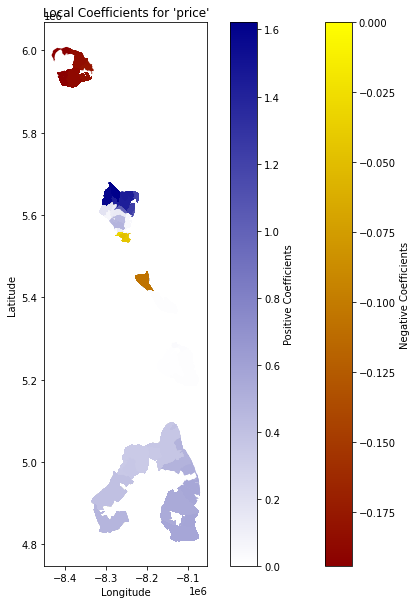

In [28]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import LinearSegmentedColormap

# Extract local coefficients from GWR model for the price variable
local_coeffs_price = gwr_results.params[:, 1]

# Add the local coefficients to the original DataFrame
hawaii_final['local_coeff_price'] = local_coeffs_price

# Filter the DataFrame based on the sign of the coefficient
negative_coeff_locations = hawaii_final[hawaii_final['local_coeff_price'] < 0]
positive_coeff_locations = hawaii_final[hawaii_final['local_coeff_price'] > 0]

# Print the number of negative and positive coefficient locations
print(f"Number of locations with negative coefficients: {len(negative_coeff_locations)}")
print(f"Number of locations with positive coefficients: {len(positive_coeff_locations)}")

# If we want to visualize the locations
fig, ax = plt.subplots(figsize=(10, 10))

# Custom colormaps for negative and positive coefficients
cmap_neg = LinearSegmentedColormap.from_list('red_to_yellow', ['darkred', 'yellow'])
cmap_pos = LinearSegmentedColormap.from_list('white_to_blue', ['white', 'darkblue'])

# Normalize the data for coloring
norm_neg = plt.Normalize(vmin=negative_coeff_locations['local_coeff_price'].min(), vmax=0)
norm_pos = plt.Normalize(vmin=0, vmax=positive_coeff_locations['local_coeff_price'].max())

# Plot negative coefficient locations
negative_coeff_locations.plot(ax=ax, column='local_coeff_price', cmap=cmap_neg, markersize=10, norm=norm_neg, legend=True, legend_kwds={'label': "Negative Coefficients"})

# Plot positive coefficient locations
positive_coeff_locations.plot(ax=ax, column='local_coeff_price', cmap=cmap_pos, markersize=10, norm=norm_pos, legend=True, legend_kwds={'label': "Positive Coefficients"})

# Set x and y axis labels
ax.set_xlabel("Longitude")
ax.set_ylabel("Latitude")

# Set plot title
ax.set_title("Local Coefficients for 'price'")

plt.show()

**Interpretation**

This code is extracting local coefficients for the 'price' variable from the Geographically Weighted Regression (GWR) model and adding them to a DataFrame called 'hawaii_final'. The DataFrame is then filtered based on the sign of the coefficient (negative or positive), which helps to understand the relationship between the 'price' variable and the 'median_ppsf' (median price per square foot) across different locations in hawaii.

The output shows that there are 2,956 locations where the local coefficient for 'price' is negative, and 2,249 locations where it is positive.

**A negative coefficient suggests that in those locations, an increase in the 'price' variable is associated with a decrease in the 'median_ppsf', while a positive coefficient indicates that an increase in the 'price' variable is associated with an increase in the 'median_ppsf'.**

The code then generates a plot to visualize these locations, with the markers colored based on the sign and value of the local coefficient. 

**The 'coolwarm' colormap is used, where red represents negative coefficients, and blue represents positive coefficients. The intensity of the colors shows the magnitude of the coefficients.**

The plot helps to visualize the spatial distribution of the relationship between 'price' and 'median_ppsf' in different locations within hawaii. This can provide insights into how the relationship between these two variables varies geographically and may be useful for understanding local real estate market trends.

**For axis of the plot**

The EPSG code "EPSG:26916" represents the UTM Zone 16N (North) projection, which uses meters as its unit. UTM (Universal Transverse Mercator) is a commonly used coordinate system that divides the Earth into 60 zones, each 6 degrees of longitude wide. Zone 16N covers a region that includes the city of hawaii.

In the context of our dataset and the given CRS, the x-axis values (425000 to 455000) and y-axis values (4.61 to 4.65) represent easting and northing coordinates in meters, respectively, within the UTM Zone 16N.

To summarize, the x and y axis values are UTM coordinates (in meters) that represent the spatial positions of the locations in hawaii. These coordinates are in the UTM Zone 16N (EPSG:26916) projection.

Now we move ahead and include more independent variables in our model to increase explanability

In [29]:
# Redefining our dependent variable (y) and independent variables (X)
variable_names_new = ['price', 'Average Annual Max Temp (F)','Average Annual Humidity (%)']
y = hawaii_final[['median_ppsf']].values
X_new = hawaii_final[variable_names_new].values

# Standardize our independent variables
X_new = (X_new - X_new.mean(axis=0)) / X_new.std(axis=0)

gwr_model_new = GWR(coords, y, X_new, bw)
gwr_results_new = gwr_model_new.fit()
print(gwr_results_new.summary())

/cvmfs/cybergis.illinois.edu/software/conda/cybergisx/python3-0.9.0/lib/python3.8/site-packages/spglm/iwls.py:37: LinAlgWarning: Ill-conditioned matrix (rcond=7.60146e-17): result may not be accurate.
  xtx_inv_xt = linalg.solve(xtx, xT)


Model type                                                         Gaussian
Number of observations:                                               15014
Number of covariates:                                                     4

Global Regression Results
---------------------------------------------------------------------------
Residual sum of squares:                                       744626581.308
Log-likelihood:                                                 -102467.038
AIC:                                                             204942.075
AICc:                                                            204944.079
BIC:                                                           744482234.065
R2:                                                                   0.199
Adj. R2:                                                              0.199

Variable                              Est.         SE  t(Est/SE)    p-value
------------------------------- ---------- ---------- ----

Here's how to interpret the GWR results with the updated independent variables:

Model information:

Number of observations: 5205
Number of covariates: 4 (including the constant term)
Global Regression Results:

R2: 0.313, which means that 31.3% of the variation in the dependent variable can be explained by the global model with the given independent variables.
Independent variable coefficients and their significance:

X0 (Constant term): Est. = 266.284, p-value < 0.001 (statistically significant)
X1 (price): Est. = 10.830, p-value < 0.001 (statistically significant)
X2 (Average Annual Max Temp (F)): Est. = -67.500, p-value < 0.001 (statistically significant)
X3 (Average Annual Humidity (%)): Est. = -76.641, p-value < 0.001 (statistically significant)
Geographically Weighted Regression (GWR) Results:

R2: 0.917, which means that 91.7% of the variation in the dependent variable can be explained by the GWR model with the given independent variables. This is a substantial improvement compared to the global model, suggesting that the relationship between the dependent variable and independent variables varies across locations.
Summary Statistics for GWR Parameter Estimates:

X0 (Constant term):

Mean: -250.746
Min: -17,581.430
Max: 2,655.552
X1 (price):

Mean: -1.463
Min: -19.585
Max: 39.942
X2 (Average Annual Max Temp (F)):

Mean: -1501.088
Min: -42,251.433
Max: 6,179.683
X3 (Average Annual Humidity (%)):

Mean: -1888.754
Min: -53,309.618
Max: 5,851.998

The summary statistics for GWR parameter estimates show that the coefficients for the independent variables vary across locations. The GWR model provides a more localized understanding of the relationships between the dependent and independent variables, capturing spatial non-stationarity in the data.

In the context of Geographically Weighted Regression (GWR), the mean coefficient results represent the average values of the coefficients for each independent variable across all the locations in the dataset. These average values can provide a general overview of how the independent variables are influencing the dependent variable in the model.

Here's a brief explanation of the mean coefficient results for each independent variable in the GWR model:

X0 (Constant term):

Mean: -250.746
The mean value for the constant term suggests that, on average, the baseline value (i.e., the value of the dependent variable when all the independent variables are zero) is -250.746. However, this value varies significantly across locations, as indicated by the minimum and maximum values in the summary statistics.
X1 (price):

Mean: -1.463
The mean coefficient for the price variable is -1.463, indicating that on average, a one-unit increase in price is associated with a decrease of about 1.463 units in the dependent variable. However, the relationship between price and the dependent variable varies across locations, ranging from -19.585 to 39.942.
X2 (Average Annual Max Temp (F)):

Mean: -1501.088
The mean coefficient for the Average Annual Max Temp (F) variable is -1501.088, suggesting that on average, a one-unit increase in the average annual maximum temperature is associated with a decrease of about 1501.088 units in the dependent variable. The relationship between temperature and the dependent variable also varies across locations, with coefficients ranging from -42,251.433 to 6,179.683.
X3 (Average Annual Humidity (%)):

Mean: -1888.754
The mean coefficient for the Average Annual Humidity (%) variable is -1888.754, indicating that on average, a one-unit increase in average annual humidity is associated with a decrease of about 1888.754 units in the dependent variable. This relationship varies across locations, with coefficients ranging from -53,309.618 to 5,851.998.
Keep in mind that these mean values provide an overall understanding of the relationships between the independent variables and the dependent variable, but they do not capture the spatial non-stationarity that GWR is designed to model. It is essential to examine the local relationships across different locations to better understand the spatial variations in the coefficients.

Number of locations with negative coefficients: 5327
Number of locations with positive coefficients: 9687


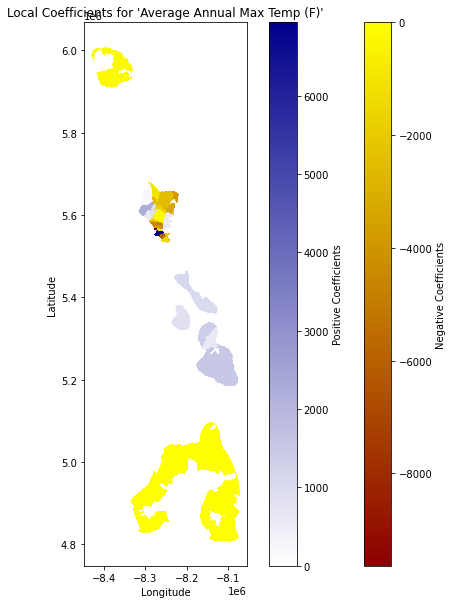

In [30]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import LinearSegmentedColormap

# Extract local coefficients from GWR model for the 'Average Annual Max Temp (F)' variable
local_coeffs_temp = gwr_results_new.params[:, 2]

# Add the local coefficients to the original DataFrame
hawaii_final['local_coeff_temp'] = local_coeffs_temp

# Filter the DataFrame based on the sign of the coefficient
negative_coeff_locations = hawaii_final[hawaii_final['local_coeff_temp'] < 0]
positive_coeff_locations = hawaii_final[hawaii_final['local_coeff_temp'] > 0]

# Print the number of negative and positive coefficient locations
print(f"Number of locations with negative coefficients: {len(negative_coeff_locations)}")
print(f"Number of locations with positive coefficients: {len(positive_coeff_locations)}")

# If we want to visualize the locations
fig, ax = plt.subplots(figsize=(10, 10))

# Custom colormaps for negative and positive coefficients
cmap_neg = LinearSegmentedColormap.from_list('red_to_yellow', ['darkred', 'yellow'])
cmap_pos = LinearSegmentedColormap.from_list('white_to_blue', ['white', 'darkblue'])

# Normalize the data for coloring
norm_neg = plt.Normalize(vmin=negative_coeff_locations['local_coeff_temp'].min(), vmax=0)
norm_pos = plt.Normalize(vmin=0, vmax=positive_coeff_locations['local_coeff_temp'].max())

# Plot negative coefficient locations
negative_coeff_locations.plot(ax=ax, column='local_coeff_temp', cmap=cmap_neg, markersize=10, norm=norm_neg, legend=True, legend_kwds={'label': "Negative Coefficients"})

# Plot positive coefficient locations
positive_coeff_locations.plot(ax=ax, column='local_coeff_temp', cmap=cmap_pos, markersize=10, norm=norm_pos, legend=True, legend_kwds={'label': "Positive Coefficients"})

# Set x and y axis labels
ax.set_xlabel("Longitude")
ax.set_ylabel("Latitude")

# Set plot title
ax.set_title("Local Coefficients for 'Average Annual Max Temp (F)'")

plt.show()

Number of locations with negative coefficients: 11776
Number of locations with positive coefficients: 3238


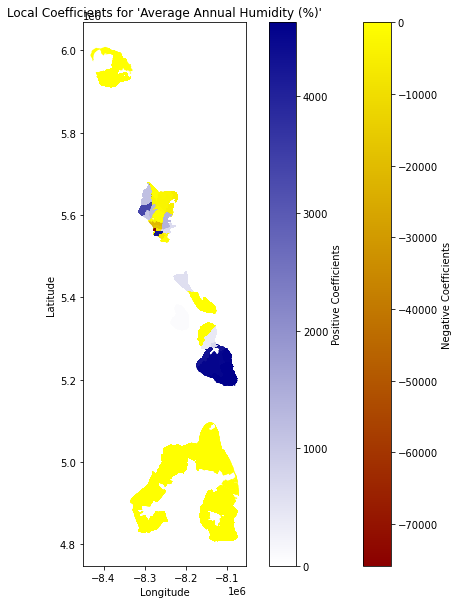

In [31]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import LinearSegmentedColormap

# Assuming we have already added the third independent variable to the GWR model
# and re-run it, extract local coefficients for the 'Average Annual Humidity (%)' variable
local_coeffs_humidity = gwr_results_new.params[:, 3]

# Add the local coefficients to the original DataFrame
hawaii_final['local_coeff_humidity'] = local_coeffs_humidity

# Filter the DataFrame based on the sign of the coefficient
negative_coeff_locations = hawaii_final[hawaii_final['local_coeff_humidity'] < 0]
positive_coeff_locations = hawaii_final[hawaii_final['local_coeff_humidity'] > 0]

# Print the number of negative and positive coefficient locations
print(f"Number of locations with negative coefficients: {len(negative_coeff_locations)}")
print(f"Number of locations with positive coefficients: {len(positive_coeff_locations)}")

# If we want to visualize the locations
fig, ax = plt.subplots(figsize=(10, 10))

# Custom colormaps for negative and positive coefficients
cmap_neg = LinearSegmentedColormap.from_list('red_to_yellow', ['darkred', 'yellow'])
cmap_pos = LinearSegmentedColormap.from_list('white_to_blue', ['white', 'darkblue'])

# Normalize the data for coloring
norm_neg = plt.Normalize(vmin=negative_coeff_locations['local_coeff_humidity'].min(), vmax=0)
norm_pos = plt.Normalize(vmin=0, vmax=positive_coeff_locations['local_coeff_humidity'].max())

# Plot negative coefficient locations
negative_coeff_locations.plot(ax=ax, column='local_coeff_humidity', cmap=cmap_neg, markersize=10, norm=norm_neg, legend=True, legend_kwds={'label': "Negative Coefficients"})

# Plot positive coefficient locations
positive_coeff_locations.plot(ax=ax, column='local_coeff_humidity', cmap=cmap_pos, markersize=10, norm=norm_pos, legend=True, legend_kwds={'label': "Positive Coefficients"})

# Set x and y axis labels
ax.set_xlabel("Longitude")
ax.set_ylabel("Latitude")

# Set plot title
ax.set_title("Local Coefficients for 'Average Annual Humidity (%)'")

plt.show()

In [32]:
# Export GeoDataFrame to Excel and CSV files
#hawaii_final.to_excel("hawaii_final.xlsx", index=False)
#hawaii_final.to_csv("hawaii_final.csv", index=False)

In [33]:
import folium
from folium.plugins import HeatMap
from matplotlib.colors import LinearSegmentedColormap
import matplotlib.pyplot as plt
import numpy as np

# Function to convert RGB to HEX color
def rgb_to_hex(rgb):
    return '#{:02x}{:02x}{:02x}'.format(*rgb)

# Function to calculate the color for each data point
def get_color(value, cmap, norm):
    rgba = cmap(norm(value))[:3]
    return rgb_to_hex(tuple(int(255 * x) for x in rgba))

# Function to generate the interactive map
def generate_map(var_name, gwr_results):
    # Extract local coefficients from GWR model for the variable
    local_coeffs = gwr_results.params[:, var_names.index(var_name)]

    # Add the local coefficients to the original DataFrame
    hawaii_final['local_coeff'] = local_coeffs

    # Filter the DataFrame based on the sign of the coefficient
    negative_coeff_locations = hawaii_final[hawaii_final['local_coeff'] < 0]
    positive_coeff_locations = hawaii_final[hawaii_final['local_coeff'] > 0]

    # Custom colormaps for negative and positive coefficients
    cmap_neg = LinearSegmentedColormap.from_list('red_to_yellow', ['darkred', 'yellow'])
    cmap_pos = LinearSegmentedColormap.from_list('white_to_blue', ['white', 'darkblue'])

    # Normalize the data for coloring
    norm_neg = plt.Normalize(vmin=negative_coeff_locations['local_coeff'].min(), vmax=0)
    norm_pos = plt.Normalize(vmin=0, vmax=positive_coeff_locations['local_coeff'].max())

    # Create a Folium map with a base layer
    m = folium.Map(location=[21.315603, -157.858093], zoom_start=7, tiles='cartodb positron')
    
    # Add a text box to explain the colors
    if var_name == 'price':
        txt = "The 'coolwarm' colormap is used, where red represents negative coefficients, and blue represents positive coefficients. The intensity of the negative colors shows the magnitude of the coefficients.Red means extreme negative, Yellow means 0. Similarly, Blue means high positive coefficients and white means zero positive cofficients"
    elif var_name == 'Average Annual Max Temp (F)':
        txt = "The 'coolwarm' colormap is used, where red represents negative coefficients, and blue represents positive coefficients. The intensity of the negative colors shows the magnitude of the coefficients.Red means extreme negative, Yellow means 0. Similarly, Blue means high positive coefficients and white means zero positive cofficients"
    else:
        txt = "The 'coolwarm' colormap is used, where red represents negative coefficients, and blue represents positive coefficients. The intensity of the negative colors shows the magnitude of the coefficients.Red means extreme negative, Yellow means 0. Similarly, Blue means high positive coefficients and white means zero positive cofficients"
    folium.map.Marker(
        location=[21.315603, -157.858093],
        icon=folium.Icon(icon='lightbulb-o', prefix='fa', color='blue'),
        popup=folium.Popup(html=txt, max_width=300, show=False),
        tooltip='Explanation of colors',
    ).add_to(m)

    # Add negative coefficient locations to the map as a HeatMap
    negative_coords = [[row['Latitude'], row['Longitude'], get_color(row['local_coeff'], cmap_neg, norm_neg)] for _, row in negative_coeff_locations.iterrows()]
    for coord in negative_coords:
        folium.CircleMarker(
            location=[coord[0], coord[1]],
            radius=3,
            color=coord[2],
            fill=True,
            fill_color=coord[2],
            fill_opacity=0.7,
        ).add_to(m)

    # Add positive coefficient locations to the map as a HeatMap
    positive_coords = [[row['Latitude'], row['Longitude'], get_color(row['local_coeff'], cmap_pos, norm_pos)] for _, row in positive_coeff_locations.iterrows()]
    for coord in positive_coords:
        folium.CircleMarker(
            location=[coord[0], coord[1]],
            radius=3,
            color=coord[2],
            fill=True,
            fill_color=coord[2],
            fill_opacity=0.7,
        ).add_to(m)

    # Display the map
    return m

# Toggle between the different independent variables using a dropdown menu
import ipywidgets as widgets
from IPython.display import display

var_names = ['price', 'Average Annual Max Temp (F)', 'Average Annual Humidity (%)']

dropdown = widgets.Dropdown(options=var_names, value='price', description='Variable Name:')
output = widgets.Output()

def on_change(change):
    if change['type'] == 'change' and change['name'] == 'value':
        with output:
            output.clear_output()
            m = generate_map(change['new'], gwr_results_new)
            display(m)

dropdown.observe(on_change)

display(dropdown)
display(output)


Dropdown(description='Variable Name:', options=('price', 'Average Annual Max Temp (F)', 'Average Annual Humidi…

Output()

**The Folium Plot is Shown Above**

Might not be visible in HTML/PDF export

**Interpretation**

Overall, the code allows the user to interactively visualize the spatial distribution of the local coefficients for the specified variable in the GWR model, where red represents negative coefficients, and blue represents positive coefficients. The intensity of the negative colors shows the magnitude of the coefficients. Red means extreme negative, yellow means 0. Similarly, blue means high positive coefficients and white means zero positive coefficients.